In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mn

In [2]:
df = pd.read_csv('data/gun_data.csv')

In [3]:
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-09,Alabama,26657.0,423.0,18034.0,15390.0,1365.0,912,0.0,16.0,...,0.0,0.0,0.0,27.0,30.0,7.0,0.0,0.0,0.0,65900
1,2021-09,Alaska,174.0,13.0,2497.0,3094.0,310.0,173,0.0,1.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,6520
2,2021-09,Arizona,5962.0,780.0,18406.0,10477.0,1769.0,985,0.0,4.0,...,0.0,0.0,0.0,10.0,9.0,3.0,0.0,2.0,0.0,40033
3,2021-09,Arkansas,3259.0,719.0,6946.0,6783.0,495.0,388,1.0,6.0,...,0.0,0.0,0.0,8.0,3.0,0.0,0.0,1.0,0.0,20536
4,2021-09,California,17520.0,14442.0,37842.0,27880.0,6190.0,0,0.0,0.0,...,101.0,0.0,0.0,6793.0,2963.0,541.0,23.0,18.0,0.0,116704


In [7]:
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,15101.000000,3.740000e+03,15105.000000,15106.000000,8140.000000,15125.000000,15102.000000,13182.000000,13180.000000,7755.000000,...,4455.000000,3630.000000,3465.000000,5390.000000,5390.000000,5390.000000,5115.000000,5390.000000,4895.000000,1.512500e+04
mean,7344.362757,9.418703e+03,7210.400199,7983.845293,563.746314,302.448463,52.095418,5.169322,7.458042,0.402579,...,3.144332,0.149862,0.155844,41.928757,26.795733,4.562894,0.997458,0.949722,0.132176,2.644057e+04
std,26276.225289,6.161715e+04,10713.851142,9200.331735,1381.967627,778.749406,557.240592,11.382515,15.733636,1.431757,...,22.301996,0.994678,0.992443,342.058497,150.273369,30.356758,4.883848,3.967613,0.528602,4.910875e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,1053.000000,2182.500000,31.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.105000e+03
50%,844.000000,0.000000e+00,3577.000000,5280.500000,184.000000,136.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.356100e+04
75%,5713.000000,9.225000e+01,8759.000000,10780.000000,589.250000,336.000000,0.000000,5.000000,8.000000,0.000000,...,1.000000,0.000000,0.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,2.942700e+04
max,522188.000000,1.350676e+06,147714.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,592.000000,13.000000,12.000000,10623.000000,4159.000000,829.000000,70.000000,62.000000,18.000000,1.427917e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15125 entries, 0 to 15124
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      15125 non-null  object 
 1   state                      15125 non-null  object 
 2   permit                     15101 non-null  float64
 3   permit_recheck             3740 non-null   float64
 4   handgun                    15105 non-null  float64
 5   long_gun                   15106 non-null  float64
 6   other                      8140 non-null   float64
 7   multiple                   15125 non-null  int64  
 8   admin                      15102 non-null  float64
 9   prepawn_handgun            13182 non-null  float64
 10  prepawn_long_gun           13180 non-null  float64
 11  prepawn_other              7755 non-null   float64
 12  redemption_handgun         13185 non-null  float64
 13  redemption_long_gun        13184 non-null  flo

In [5]:
df.isnull().values.sum()

154595

<AxesSubplot:>

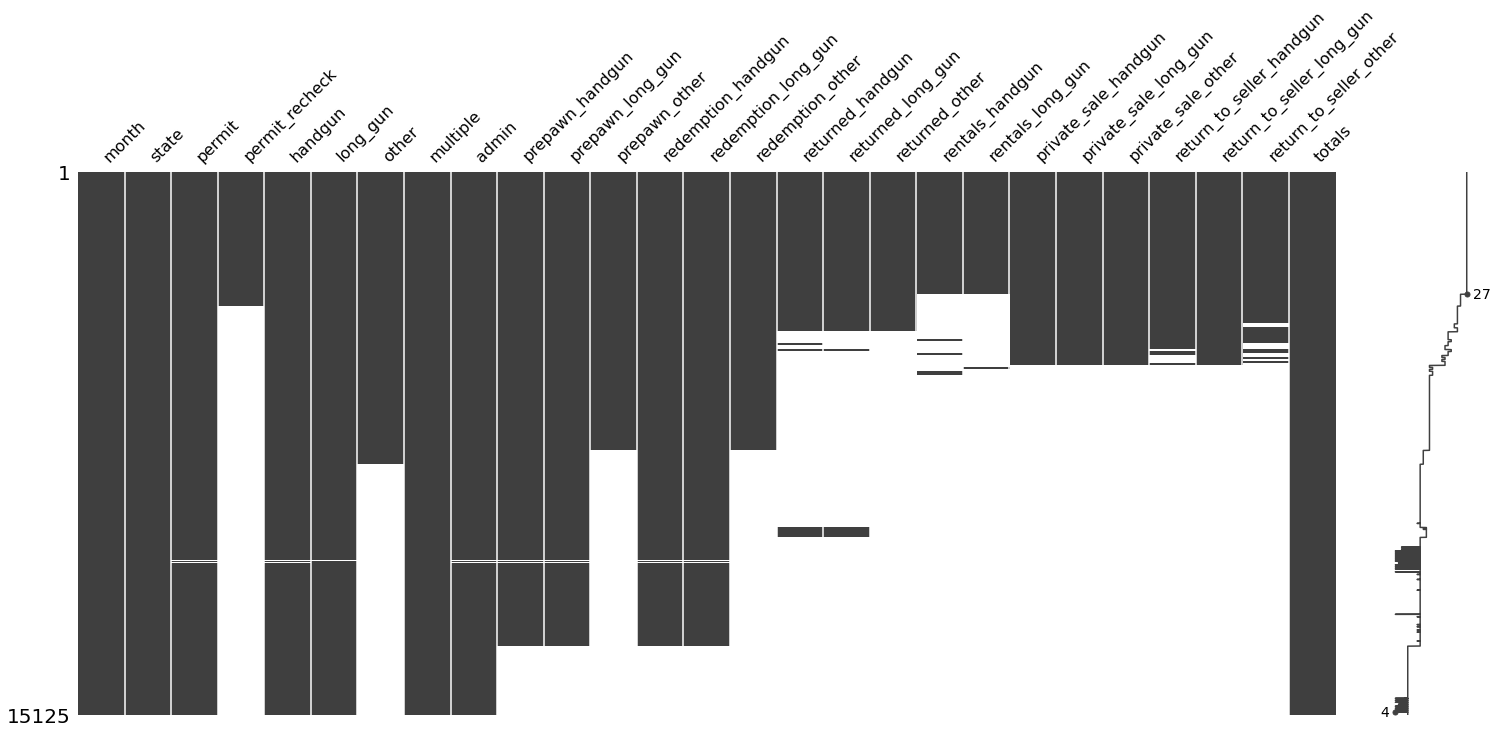

In [6]:
mn.matrix(df)